In [1]:
## LAB -> Option LAB 2 WEEK 3  -> Multiple Variable Linear Regression
print(f"Option LAB 2 WEEK 2 -> Feature Engineering and Polynomial Regression")

Option LAB 2 WEEK 4 -> Feature Engineering and Polynomial Regression


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision = 2) # reduced display precision in numpy arrays

Iteration         0, Cost: 2.62261e+03
Iteration       100, Cost: 7.72911e+02
Iteration       200, Cost: 6.43339e+02
Iteration       300, Cost: 5.64871e+02
Iteration       400, Cost: 5.17352e+02
Iteration       500, Cost: 4.88575e+02
Iteration       600, Cost: 4.71147e+02
Iteration       700, Cost: 4.60594e+02
Iteration       800, Cost: 4.54202e+02
Iteration       900, Cost: 4.50332e+02
w,b found by gradient descent: w: [19.5], b: -59.3109


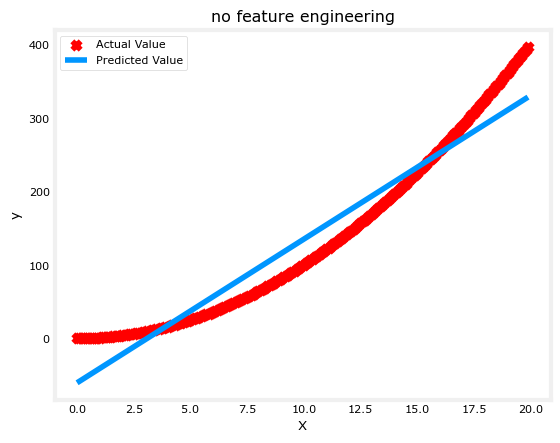

In [3]:
#create target data
x = np.arange(0, 20, 0.1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X, y, iterations = 1000, alpha = 1e-2)

plt.scatter(x,y, marker = 'x', c = 'r', label = "Actual Value")
plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
## as expected, the model is not able to fit the data

In [6]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

#Enginner features
X = x**2    #<-- added engineered feature

Iteration         0, Cost: 7.32922e+03
Iteration       100, Cost: 2.26705e-01
Iteration       200, Cost: 2.26497e-01
Iteration       300, Cost: 2.26290e-01
Iteration       400, Cost: 2.26083e-01
Iteration       500, Cost: 2.25876e-01
Iteration       600, Cost: 2.25669e-01
Iteration       700, Cost: 2.25463e-01
Iteration       800, Cost: 2.25256e-01
Iteration       900, Cost: 2.25050e-01
w,b found by gradient descent: w: [1.], b: 0.0090


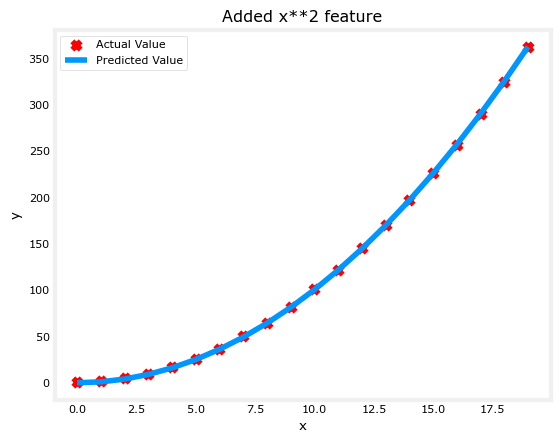

In [7]:
X = X.reshape(-1, 1)  # X should be a 2D Matrix
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 1000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [8]:
## as expected, the model is able to fit the data
## if we would run the model for more iterations, we would get a better fit

In [9]:
## In the above example it was clear that we x^2 was required to fit the data
## But in real life, it is not always clear which features are required
## So we can add a variety of pontential features to try and find the most usefull ones

# create target data
x = np.arange(0, 20, 1)
y = x**2

#engineer features
X = np.c_[x, x**2, x**3]   #<-- added engineered features

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


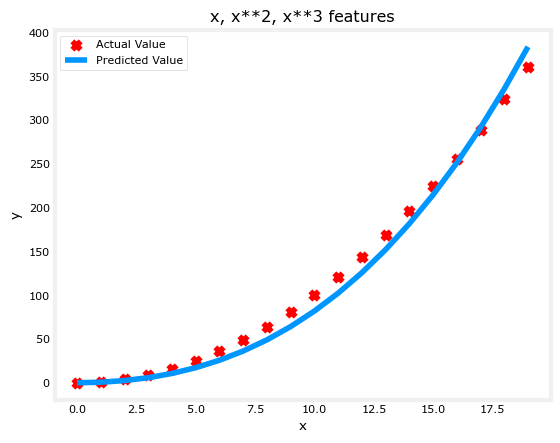

In [11]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value")
plt.xlabel("x") 
plt.ylabel("y")
plt.legend()
plt.show()

In [12]:
## Gradient descent has emphasized the data is the best fit to the x**2 data by increasing the w1 term relative to the other terms
## If you were to run the model for more iterations, it would continue to reduce the impact of other terms

In [13]:
## An alternative View

# create target data
x = np.arange(0, 20, 1)
y = x**2

#engineer features
X = np.c_[x, x**2, x**3]   #<-- added engineered features
X_features = ['x', 'x^2', 'x^3']

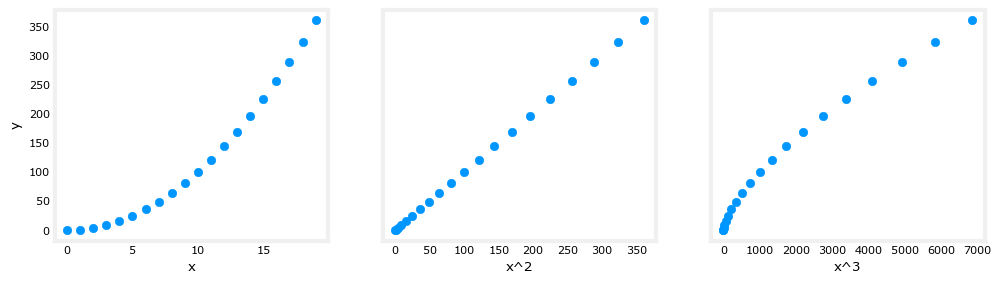

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [16]:
## Scaling features

# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]   #<-- added engineered features
print(f"Peak to Peak range by column in Raw X: {np.ptp(X, axis = 0)}")

## add mean_normalization
X  = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X, axis = 0)}")

Peak to Peak range by column in Raw X: [  19  361 6859]
Peak to Peak range by column in Normalized X: [3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration      1000, Cost: 4.21521e+00
Iteration      2000, Cost: 3.23649e+00
Iteration      3000, Cost: 2.48501e+00
Iteration      4000, Cost: 1.90802e+00
Iteration      5000, Cost: 1.46500e+00
Iteration      6000, Cost: 1.12484e+00
Iteration      7000, Cost: 8.63665e-01
Iteration      8000, Cost: 6.63131e-01
Iteration      9000, Cost: 5.09160e-01
w,b found by gradient descent: w: [ 7.67 93.95 12.29], b: 123.5000


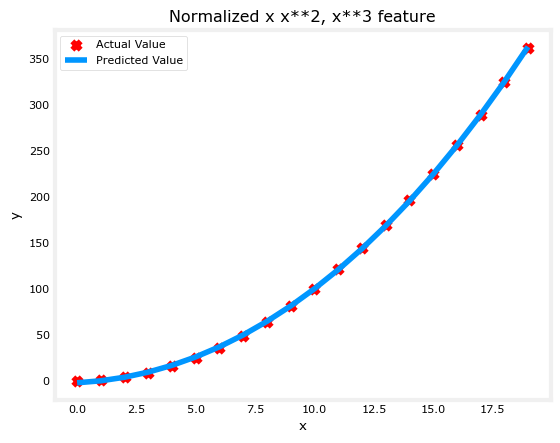

In [17]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]   #<-- added engineered features
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X,y, iterations = 10000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
## feature scaling allows this to converge much faster